In [323]:
import graphviz
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import tree

In [324]:
import numpy as np
from numpy import array
import graphviz
import pandas as pd
import matplotlib.pyplot as plt

In [325]:

### global constant variables
#------------------------------------------------------------------------
# general
#------------------------------------------------------------------------                #  number of APs
VERBOSE = 1                     # 0 for turning off logging
#------------------------------------------------------------------------
# stacked auto encoder (sae)
#------------------------------------------------------------------------
# SAE_ACTIVATION = 'tanh'
SAE_ACTIVATION = 'relu'
SAE_BIAS = False
SAE_OPTIMIZER = 'adam'
SAE_LOSS = 'mse'
#------------------------------------------------------------------------
# classifier
#------------------------------------------------------------------------
CLASSIFIER_ACTIVATION = 'relu'
CLASSIFIER_BIAS = False
CLASSIFIER_OPTIMIZER = 'adam'
CLASSIFIER_LOSS = 'binary_crossentropy'
training_ratio = 0.9            # ratio of training data to overall data                # number of labels
verbose = 1                     # 0 for turning off logging
seed = 7                        # random number seed for reproducibility
#------------------------------------------------------------------------
# stacked auto encoder (sae)
#------------------------------------------------------------------------
# sae_activation = 'tanh'
sae_activation = 'relu'
sae_bias = False
sae_optimizer = 'adam'
sae_loss = 'mse'
#------------------------------------------------------------------------
# classifier
#------------------------------------------------------------------------
# classifier_activation = 'relu'
classifier_activation = 'tanh'
classifier_bias = False
classifier_optimizer = 'adam'
# classifier_optimizer = 'rmsprop'
classifier_loss = 'categorical_crossentropy'
# dropout_rates = [0.5]           # for test
# dropout_rates = np.arange(6)*0.1  # 0.0,0.1,...,0.5
#------------------------------------------------------------------------
# input files
#------------------------------------------------------------------------
path_train = '../data/UJIIndoorLoc/trainingData2.csv' # '-110' for the lack of AP.
path_validation = '../data/UJIIndoorLoc/validationData2.csv' # ditto
#------------------------------------------------------------------------
# output files
#------------------------------------------------------------------------
batch_size=10
classifier_hidden_layers=[16,16]
dropout=0.0
learning_rate=0.001

In [326]:
df = pd.read_csv('data_con.csv',
            delimiter=',', names=['x', 'y', 'Beacon 1', 'Beacon 2', 'Beacon 3', 'Beacon 4', 'Beacon 5', 'Beacon 6', 'Wifi 1', 'Wifi 2', 'localization1', 'localization4_5g', 'UVIC_Eduroam3', 'localization2', 'localization3_5g', 'UVIC_Eduroam4', 'localization1_5g'])
df = df.loc[:,['x','y','Beacon 1', 'Beacon 2', 'Beacon 3', 'Beacon 4', 'Beacon 5', 'Beacon 6']]
X_train = df.drop(['x', 'y'], axis = 1)
y_train = df[['x', 'y']]
df.head()

,x,y,Beacon 1,Beacon 2,Beacon 3,Beacon 4,Beacon 5,Beacon 6
0,2.5,4.5,-66,-72,-73,-67,-77,-83
1,3.0,4.5,-61,-70,-79,-75,-76,-79
2,3.0,5.0,-65,-87,-79,-74,-75,-72
3,3.0,5.5,-70,-76,-74,-74,-68,-71
4,3.0,6.0,-71,-70,-78,-72,-76,-68


In [327]:
df_test = pd.read_csv('data_test.csv',
            delimiter=',', names=['x', 'y', 'Beacon 1', 'Beacon 2', 'Beacon 3', 'Beacon 4', 'Beacon 5', 'Beacon 6', 'Wifi 1', 'Wifi 2', 'localization1', 'localization4_5g', 'UVIC_Eduroam3', 'localization2', 'localization3_5g', 'UVIC_Eduroam4', 'localization1_5g'])
df_test = df_test.loc[:,['x','y','Beacon 1', 'Beacon 2', 'Beacon 3', 'Beacon 4', 'Beacon 5', 'Beacon 6']]
X_test = df_test.drop(['x', 'y'], axis = 1)
y_test = df_test[['x', 'y']]
df_test.head()

,x,y,Beacon 1,Beacon 2,Beacon 3,Beacon 4,Beacon 5,Beacon 6
0,7.0,6.0,-73,-67,-79,-66,-52,-71
1,6.0,5.5,-80,-63,-83,-63,-64,-73
2,6.5,4.0,-81,-72,-77,-63,-59,-69
3,7.0,3.0,-74,-69,-79,-64,-63,-74
4,6.0,2.5,-72,-82,-85,-58,-62,-67


In [328]:
# from sklearn.tree import DecisionTreeRegressor
# regressor = DecisionTreeRegressor()
# regressor.fit(X_train, y_train)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

input_dim = len(X_train.columns)
output_dim = len(y_train.columns)
epochs=300
sae_hidden_layers=[12,14,10,8,4]

model = Sequential()
model.add(
    Dense(
        sae_hidden_layers[0],
        input_dim=input_dim,
        activation=SAE_ACTIVATION,
        use_bias=SAE_BIAS))
for units in sae_hidden_layers[1:]:
    model.add(Dense(units, activation=SAE_ACTIVATION, use_bias=SAE_BIAS))
model.add(Dense(output_dim, activation=SAE_ACTIVATION, use_bias=SAE_BIAS))
model.compile(optimizer=SAE_OPTIMIZER, loss=SAE_LOSS)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=VERBOSE)

regressor = model
y_pred = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Epoch 1/300
32/32 [==============================] - 0s 2ms/step - loss: 22.6411
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 4.8699
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 3.1658
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 2.6519
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 2.4851
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 2.2543
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 2.1265
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 2.0680
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 2.0216
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - loss: 1.9553
Epoch 11/300
32/32 [==============================] - 0s 2ms/step - loss: 1.9511
Epoch 12/300
32/32 [==============================] - 0s 2ms/step - loss: 1.9044
Epoch 13/300
32/32 [================

In [329]:
y_pred = regressor.predict(X_test)

# def plot_loss (history, model_name):
#     plt.figure(figsize = (10, 6))
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('Model Train vs Validation Loss for ' + model_name)
#     plt.ylabel('Loss')
#     plt.xlabel('epoch')
#     plt.legend(['Train loss', 'Validation loss'], loc='upper right')
#     #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/loss_'+model_name+'.jpg', format='jpg', dpi=1000)


# plot_loss (history, 'LSTM')

1/1 [==============================] - 0s 15ms/step


In [330]:
print(y_pred)
print(y_test)

[[6.8206587 4.6112523]
 [6.5179462 4.772414 ]
 [7.0804095 4.472018 ]
 [6.4103284 4.805838 ]
 [6.2019362 2.9017863]
 [5.7595935 5.337904 ]
 [3.1831985 4.6662393]
 [6.037645  6.1181264]
 [3.2642903 4.3584223]]
     x    y
0  7.0  6.0
1  6.0  5.5
2  6.5  4.0
3  7.0  3.0
4  6.0  2.5
5  4.5  4.5
6  4.0  5.5
7  3.0  6.0
8  2.5  4.5


In [349]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.81527664926317
Mean Squared Error: 1.1458604396780805
Root Mean Squared Error: 1.0704487095036737


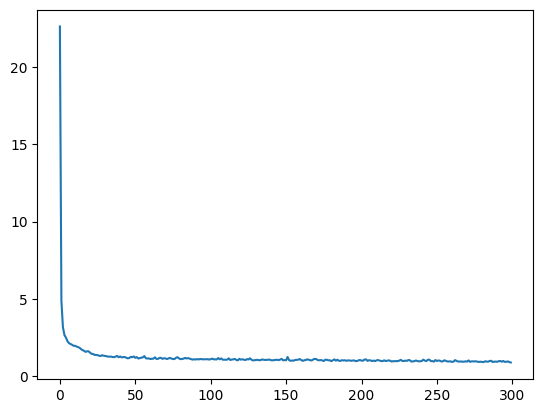

In [348]:
# print(history.history["loss"])
plt.plot(history.history["loss"])
plt.show()

In [ ]:
plt.plot(df.Actual.index, df.Actual)
plt.plot(df.Actual.index, df.Predicted)
plt.show()